In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import re

In [2]:
fiscal_data = pd.read_csv("Sdf16_1a.txt", sep='\t', low_memory=False)
fiscal_data['LEAID'] = fiscal_data['LEAID'].astype(str)

In [3]:
math_data = pd.read_csv("math-achievement-lea-sy2015-16.csv", low_memory=False)
math_data['LEAID'] = math_data['LEAID'].astype(str)

### Problem 1

In [4]:
federal_rev_per_state = fiscal_data[["STNAME", "TFEDREV"]]
federal_rev_per_state = federal_rev_per_state[federal_rev_per_state['TFEDREV'] >= 0]
federal_rev_per_state = federal_rev_per_state.groupby(["STNAME"]).sum().reset_index()
federal_rev_per_state.rename(columns={'STNAME': 'State', 'TFEDREV': 'Federal Funding'}, inplace=True)
federal_rev_per_state["Rank"] = federal_rev_per_state["Federal Funding"].rank(ascending=False) 
federal_rev_per_state = federal_rev_per_state.sort_values(by=['Rank']).reset_index()
federal_rev_per_state = federal_rev_per_state[["State", "Federal Funding", "Rank"]]
federal_rev_per_state

,State,Federal Funding,Rank
0,California,7709275000,1.0
1,Texas,6194317000,2.0
2,New York,3374794000,3.0
3,Florida,3147329000,4.0
4,Illinois,2334945000,5.0
5,Pennsylvania,2037315000,6.0
6,Ohio,1837963000,7.0
7,Georgia,1815242000,8.0
8,Michigan,1731034000,9.0
9,North Carolina,1587976000,10.0


<Figure size 1152x576 with 0 Axes>

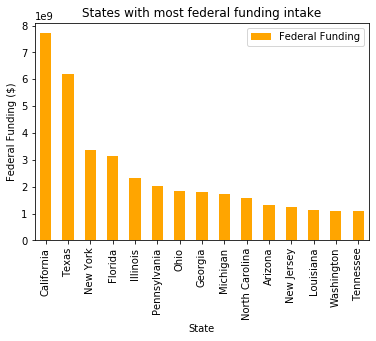

In [5]:
plt.figure(figsize=(16,8))
federal_rev_per_state[:15].plot(kind='bar', x='State', y='Federal Funding',color='orange')
plt.ylabel("Federal Funding ($)")
plt.title('States with most federal funding intake')
plt.show()

In [6]:
federal_rev_per_state = fiscal_data[fiscal_data['TOTALEXP'] >= 0]
federal_rev_per_state = federal_rev_per_state[federal_rev_per_state['V33'] >= 0]
fedfund_spend_state = federal_rev_per_state[["STNAME", "TOTALEXP", "V33"]].groupby(['STNAME']).sum().reset_index()
fedfund_spend_state['Total students'] = fedfund_spend_state["V33"]
fedfund_spend_state['Expenditure per student'] = round(fedfund_spend_state['TOTALEXP'] / fedfund_spend_state['Total students'], 2)
fedfund_spend_state.rename(columns={'STNAME': 'State'}, inplace=True)
fedfund_spend_state["Rank"] = fedfund_spend_state["Expenditure per student"].rank(ascending=False) 
fedfund_spend_state = fedfund_spend_state.sort_values(by=['Rank']).reset_index()
fedfund_spend_state = fedfund_spend_state[["State", "Expenditure per student", "Rank"]]
fedfund_spend_state

,State,Expenditure per student,Rank
0,District of Columbia,26911.76,1.0
1,New York,26366.98,2.0
2,Wyoming,21523.73,3.0
3,Connecticut,21108.56,4.0
4,New Jersey,20913.12,5.0
5,Vermont,20000.67,6.0
6,Alaska,19799.77,7.0
7,Massachusetts,18386.89,8.0
8,Pennsylvania,17897.85,9.0
9,Rhode Island,17709.68,10.0


<Figure size 1008x1152 with 0 Axes>

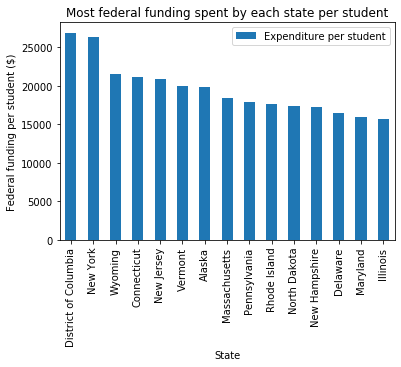

In [7]:
plt.figure(figsize=(14,16))
fedfund_spend_state[:15].plot.bar(x = 'State', y='Expenditure per student')
plt.ylabel("Federal funding per student ($)")
plt.title("Most federal funding spent by each state per student")
plt.show()

### Problem 2

In [8]:
district_data = fiscal_data[["LEAID", "STNAME", "TOTALREV", "TOTALEXP","V33"]]
district_data = district_data[district_data['TOTALREV']>=0]
district_data = district_data[district_data['TOTALEXP']>=0]
district_data = district_data[district_data['V33']>=0]

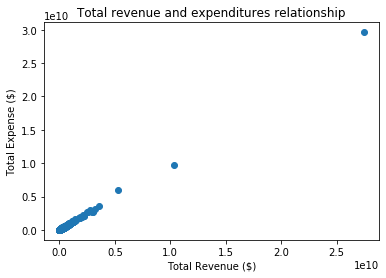

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(data = district_data, x='TOTALREV', y='TOTALEXP')
plt.ylabel("Total Expense ($)")
plt.xlabel("Total Revenue ($)")
plt.title('Total revenue and expenditures relationship')
plt.show()

In [10]:
debt_data = district_data[["STNAME", "TOTALEXP", "TOTALREV", "V33"]].groupby(['STNAME']).sum()
debt_data['DEBT'] = debt_data['TOTALEXP'] - debt_data['TOTALREV']
debt_data['Debt per student'] = debt_data['DEBT']/debt_data['V33']
debt_data = debt_data[debt_data['DEBT']>0].reset_index()

In [11]:
debt_data["Rank"] = debt_data["Debt per student"].rank(ascending=False) 
debt_data = debt_data.sort_values(by=['Rank']).reset_index()
debt_data.rename(columns={'STNAME': 'State'}, inplace=True)
debt_data = debt_data[["State", "Debt per student", "Rank"]]
debt_data

,State,Debt per student,Rank
0,North Dakota,1595.613744,1.0
1,District of Columbia,1347.000265,2.0
2,Alaska,968.643614,3.0
3,Nebraska,763.258140,4.0
4,Minnesota,631.011365,5.0
5,Montana,540.590050,6.0
6,New York,528.266517,7.0
7,North Carolina,506.791967,8.0
8,Alabama,346.251423,9.0
9,Washington,282.496596,10.0


<Figure size 1008x1152 with 0 Axes>

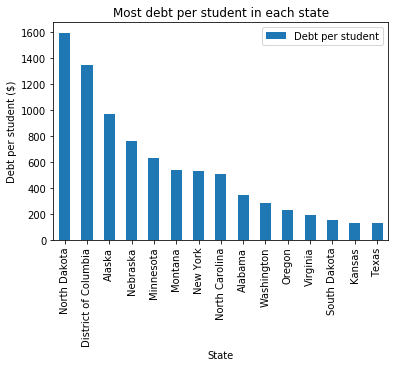

In [49]:
plt.figure(figsize=(14,16))
debt_data[:15].plot.bar(x = 'State', y='Debt per student')
plt.ylabel("Debt per student ($)")
plt.title("Most debt per student in each state")
plt.show()

### Problem 3

In [13]:
def blurred_resolve(df, blurred_col):
    df_new = df[[blurred_col]]
    df_new = df_new.replace(np.nan, "nan")
    for i in range(len(df_new)):
        val = str(df_new.iloc[i][blurred_col])
        if val in ['PS','.','nan']:
            df_new.loc[i, blurred_col] = np.nan
        elif (val.find('LE') != -1):
            df_new.loc[i, blurred_col] = random.randint(0, int(val[2:]))
        elif (val.find('LT') != -1):
            df_new.loc[i, blurred_col] = random.randint(0, int(val[2:])-1)
        elif (val.find('GE') != -1):
            df_new.loc[i, blurred_col] = random.randint(int(val[2:]), 100)
        elif (val.find('GT') != -1):
            df_new.loc[i, blurred_col] = random.randint(int(val[2:])+1, 100)
        elif bool(re.search('-', val)):
            val1, val2 = [int(x) for x in val.split('-')]
            df_new.loc[i, blurred_col] = round((val1 + val2)/2)
        else:
            df_new.loc[i, blurred_col] = int(val)
    return df_new

In [14]:
unblurr_col = blurred_resolve(math_data, 'MAM_MTH00PCTPROF_1516')

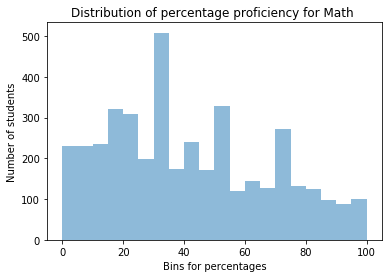

In [15]:
n, bins, patches = plt.hist(unblurr_col['MAM_MTH00PCTPROF_1516'].dropna(), bins=20, alpha =0.5)
plt.ylabel('Number of students')
plt.xlabel('Bins for percentages')
plt.title('Distribution of percentage proficiency for Math ')
plt.show()

### Problem 4

In [20]:
federal_rev = fiscal_data[fiscal_data['TFEDREV'] >= 0]
total_federal_rev = int(federal_rev[['TFEDREV']].sum())
print('Total U.S. federal budget for funding school districts: $',total_federal_rev)
total_amount_cut = int(total_federal_rev*0.15)
print('15% of the U.S. federal budget for funding school districts: $', total_amount_cut)

Total U.S. federal budget for funding school districts: $ 55602742000
15% of the U.S. federal budget for funding school districts: $ 8340411300


In [45]:
debt = district_data[["LEAID","TOTALEXP", "TOTALREV"]].groupby(['LEAID']).sum().reset_index()
debt['DEBT'] = debt['TOTALEXP'] - debt['TOTALREV']
debt_neg = debt[debt['DEBT'] < 0]
debt_neg['DEBT'] = -debt_neg['DEBT']
total_extra = debt_neg['DEBT'].sum()
total_extra

C:\Users\aanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


26211614000

In [47]:
debt_neg['REV_CUT'] = round((total_amount_cut/total_extra)*(debt_neg['DEBT']))
revenue_cut = debt_neg[['LEAID','REV_CUT']]

C:\Users\aanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
revenue_cut

,LEAID,REV_CUT
0,0100005,959995.0
2,0100007,828580.0
3,0100008,1518746.0
5,0100012,127278.0
7,0100030,894765.0
...,...,...
15957,5605762,1085046.0
15958,5605820,53775.0
15959,5605830,91004.0
15960,5606090,42320.0
